In [ ]:
Deleting existing file: /content/drive/MyDrive/h5_train_features
[STATUS] Feature vector saved to /content/drive/MyDrive/h5_train_features
Deleting existing file: /content/drive/MyDrive/h5_train_labels
[STATUS] Label vector saved to /content/drive/MyDrive/h5_train_labels

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

train_path = '/content/drive/MyDrive/apple_features.npy'
test_path = '/content/drive/MyDrive/apple_test_output_directory'

# Create test directory if it doesn't exist
if not os.path.exists(test_path):
    os.makedirs(test_path)
    print(f"[STATUS] Created test directory at {test_path}")
else:
    print(f"[STATUS] Test directory already exists at {test_path}")

[STATUS] Created test directory at /content/drive/MyDrive/apple_test_output_directory


In [4]:
# Import libraries for training and evaluation
import h5py
import numpy as np
import os
import cv2
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import joblib
import seaborn as sns # Import seaborn for heatmap

warnings.filterwarnings("ignore")  # Suppress warnings

# Define tunable parameters
num_trees = 100  # Number of trees for RandomForest
test_size = 0.20  # Test set proportion
seed = 9  # Random seed for reproducibility
scoring = "accuracy"  # Scoring metric



# Initialize machine learning models
models = []
models.append(("LR", LogisticRegression(random_state=seed)))  # Logistic Regression
models.append(("LDA", LinearDiscriminantAnalysis()))  # Linear Discriminant Analysis
models.append(("KNN", KNeighborsClassifier()))  # K-Nearest Neighbors
models.append(("DTC", DecisionTreeClassifier(random_state=seed)))  # Decision Tree
models.append(("RF", RandomForestClassifier(n_estimators=num_trees, random_state=seed)))  # Random Forest
models.append(("NB", GaussianNB()))  # Gaussian Naive Bayes
models.append(("SVM", SVC(random_state=seed)))  # Support Vector Machine

# Initialize lists for results and model names
results = []
names = []

# Load feature and label embeddings from .npy files
# Use numpy.load for .npy files
try:
    global_features = np.load(train_path)
    # Define the path for the labels file, assuming it's named apple_labels.npy
    label_path = '/content/drive/MyDrive/apple_labels.npy'
    global_labels = np.load(label_path)

except FileNotFoundError:
    print(f"[ERROR] Ensure that '{train_path}' and '{label_path}' exist.")
    # You might want to exit or handle this error appropriately
    exit()


# Verify shapes of features and labels
print("[STATUS] features shape: {}".format(global_features.shape))
print("[STATUS] labels shape: {}".format(global_labels.shape))
print("[STATUS] training started...")
print(global_labels, len(global_labels), len(global_features))


# Print classification report for model predictions
# This part of the code will likely fail as 'y_predict' is not defined in this scope.
# print(classification_report(testLabelsGlobal, y_predict))

# Calculate and return accuracy score for predictions
# This part of the code will likely fail as 'y_predict' is not defined in this scope.
# accuracy_score(testLabelsGlobal, y_predict)

[STATUS] features shape: (3171, 1280)
[STATUS] labels shape: (3171,)
[STATUS] training started...
[0 3 3 ... 3 3 2] 3171 3171


In [5]:
# Split data into training and testing sets
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(
    np.array(global_features), np.array(global_labels), test_size=test_size, random_state=seed
)
print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))

[STATUS] splitted train and test data...
Train data  : (2536, 1280)
Test data   : (635, 1280)


In [6]:
# Display training data (features)
trainDataGlobal

array([[ 0.13464761, -0.12257592,  0.14326565, ...,  0.38251615,
        -0.04253936, -0.1329157 ],
       [-0.0693527 , -0.12140893, -0.07861065, ...,  0.5198084 ,
        -0.03190815,  0.18353382],
       [ 0.65283847, -0.04847456, -0.04271944, ...,  0.47701037,
        -0.08613946, -0.05711632],
       ...,
       [ 0.5874403 , -0.07565726, -0.10044391, ...,  0.7418881 ,
         0.03679932,  0.43483838],
       [ 0.40081382, -0.10851453,  0.12990512, ...,  0.06589434,
         0.20382912, -0.03106096],
       [-0.03159959, -0.06140119, -0.04741178, ...,  0.5222202 ,
        -0.05153775,  0.598087  ]], dtype=float32)

In [7]:
# Perform 10-fold cross-validation for each model
for name, model in models:
    kfold = KFold(n_splits=10)  # 10-fold cross-validation
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    results.append(cv_results)  # Store results
    names.append(name)  # Store model name
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())  # Print mean and std of accuracy
    print(msg)

LR: 0.988169 (0.006109)
LDA: 0.979103 (0.007265)
KNN: 0.948327 (0.015777)
DTC: 0.814667 (0.023271)
RF: 0.942419 (0.014697)
NB: 0.888397 (0.024279)
SVM: 0.983438 (0.005516)


In [8]:
# create new direcrtory and save all models

# Directory to save trained models
model_save_dir = os.path.join(test_path, "trained_models")

# Create the directory if it doesn't exist
if not os.path.exists(model_save_dir):
    os.makedirs(model_save_dir)
    print(f"[STATUS] Created model save directory at {model_save_dir}")
else:
    print(f"[STATUS] Model save directory already exists at {model_save_dir}")

# Train and save each model
for name, model in models:
    # Train the model
    model.fit(trainDataGlobal, trainLabelsGlobal)

    # Define the filename for the saved model
    model_filename = os.path.join(model_save_dir, f"{name}_model.pkl")

    # Save the trained model using joblib
    joblib.dump(model, model_filename)
    print(f"[STATUS] Saved model '{name}' to '{model_filename}'")

    # Make predictions (optional, but good for immediate testing)
    # y_predict = model.predict(testDataGlobal)
    # print(f"[STATUS] Predictions for {name}:")
    # print(y_predict)

[STATUS] Created model save directory at /content/drive/MyDrive/apple_test_output_directory/trained_models
[STATUS] Saved model 'LR' to '/content/drive/MyDrive/apple_test_output_directory/trained_models/LR_model.pkl'
[STATUS] Saved model 'LDA' to '/content/drive/MyDrive/apple_test_output_directory/trained_models/LDA_model.pkl'
[STATUS] Saved model 'KNN' to '/content/drive/MyDrive/apple_test_output_directory/trained_models/KNN_model.pkl'
[STATUS] Saved model 'DTC' to '/content/drive/MyDrive/apple_test_output_directory/trained_models/DTC_model.pkl'
[STATUS] Saved model 'RF' to '/content/drive/MyDrive/apple_test_output_directory/trained_models/RF_model.pkl'
[STATUS] Saved model 'NB' to '/content/drive/MyDrive/apple_test_output_directory/trained_models/NB_model.pkl'
[STATUS] Saved model 'SVM' to '/content/drive/MyDrive/apple_test_output_directory/trained_models/SVM_model.pkl'


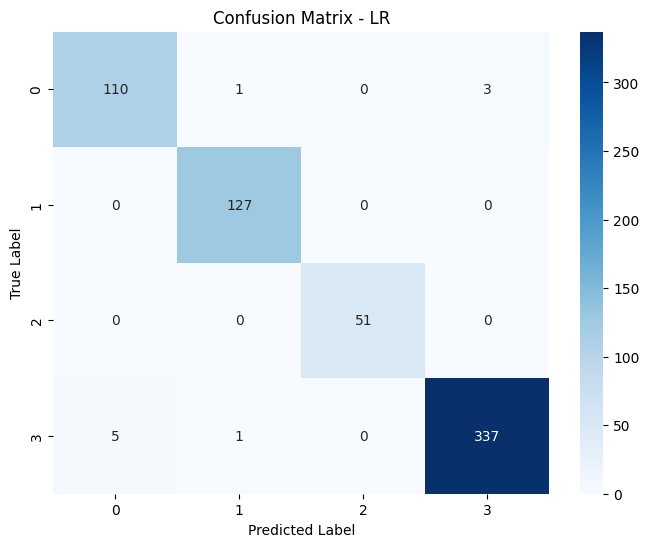

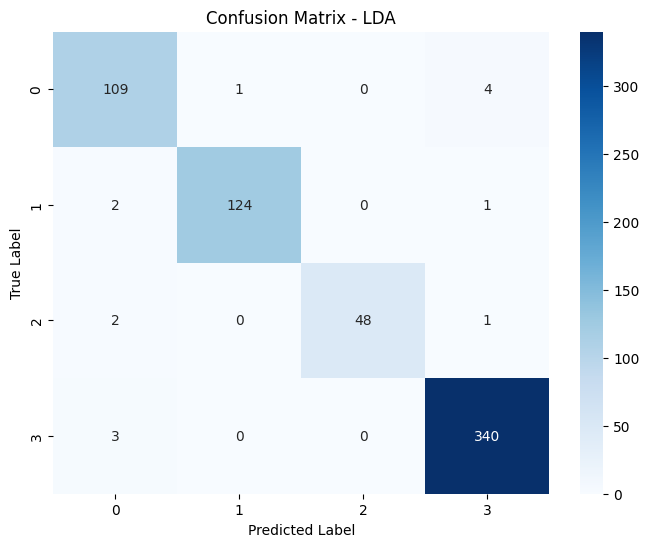

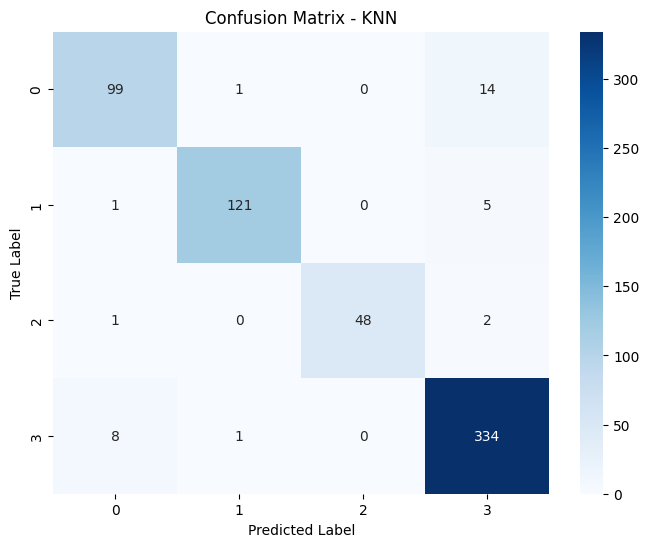

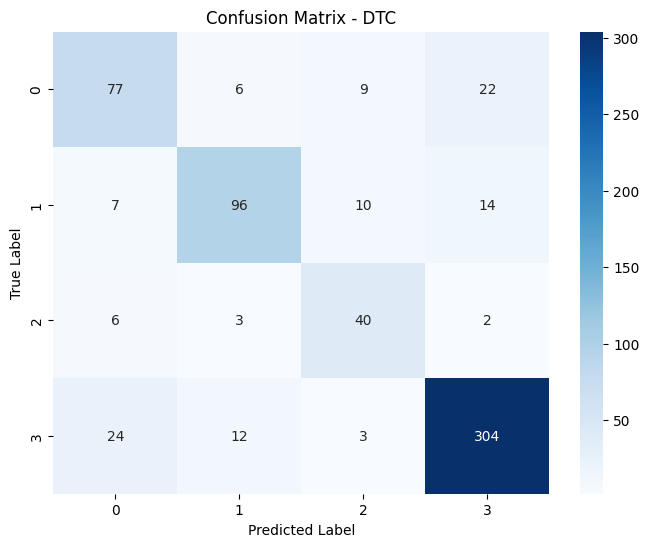

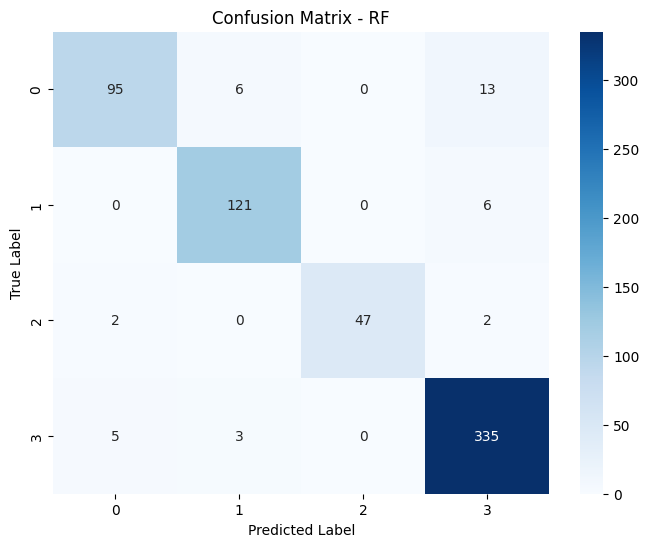

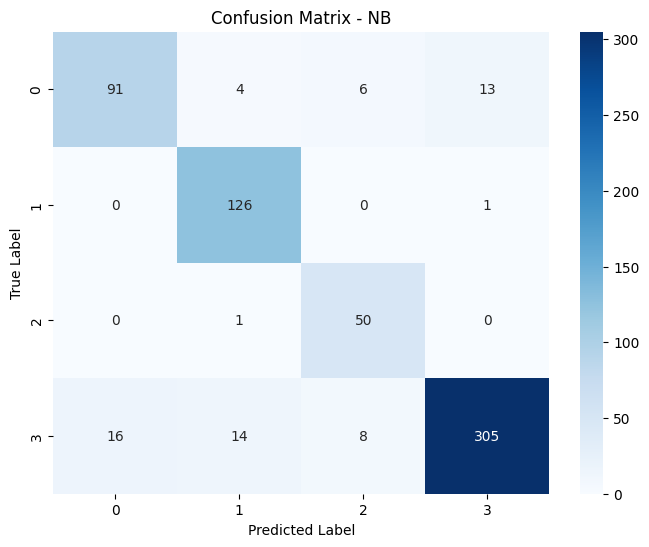

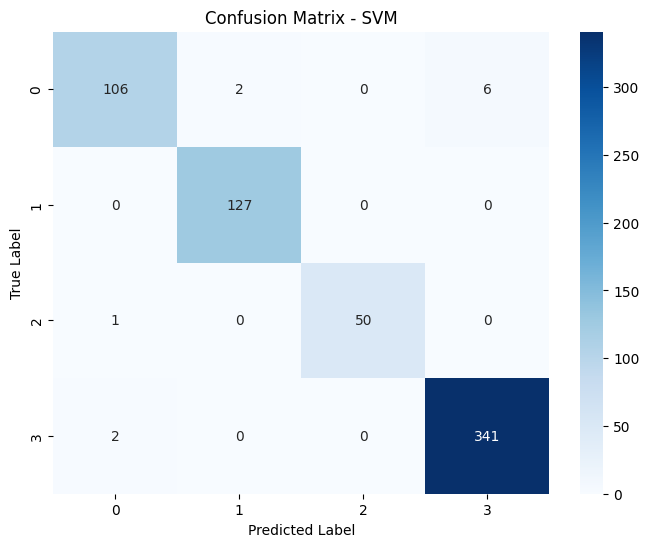

In [9]:
# prompt: visualize all models confusion matrix

import numpy as np
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

import matplotlib.pyplot as plt

# Get unique class labels from the training data
class_labels = np.unique(trainLabelsGlobal)

# Visualize confusion matrix for each trained model
for name, model in models:
    # Define the filename for the saved model
    model_filename = os.path.join(model_save_dir, f"{name}_model.pkl")

    try:
        # Load the trained model
        loaded_model = joblib.load(model_filename)

        # Make predictions on the test data
        y_predict = loaded_model.predict(testDataGlobal)

        # Plot the confusion matrix
        plot_confusion_matrix(testLabelsGlobal, y_predict, class_labels, f'Confusion Matrix - {name}')

    except FileNotFoundError:
        print(f"[ERROR] Model file '{model_filename}' not found. Skipping confusion matrix for {name}.")
    except Exception as e:
        print(f"[ERROR] An error occurred while plotting confusion matrix for {name}: {e}")